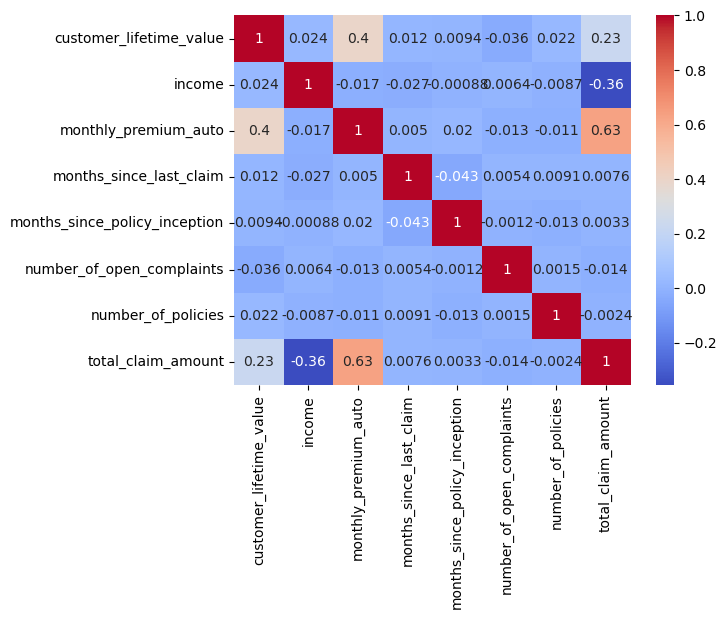

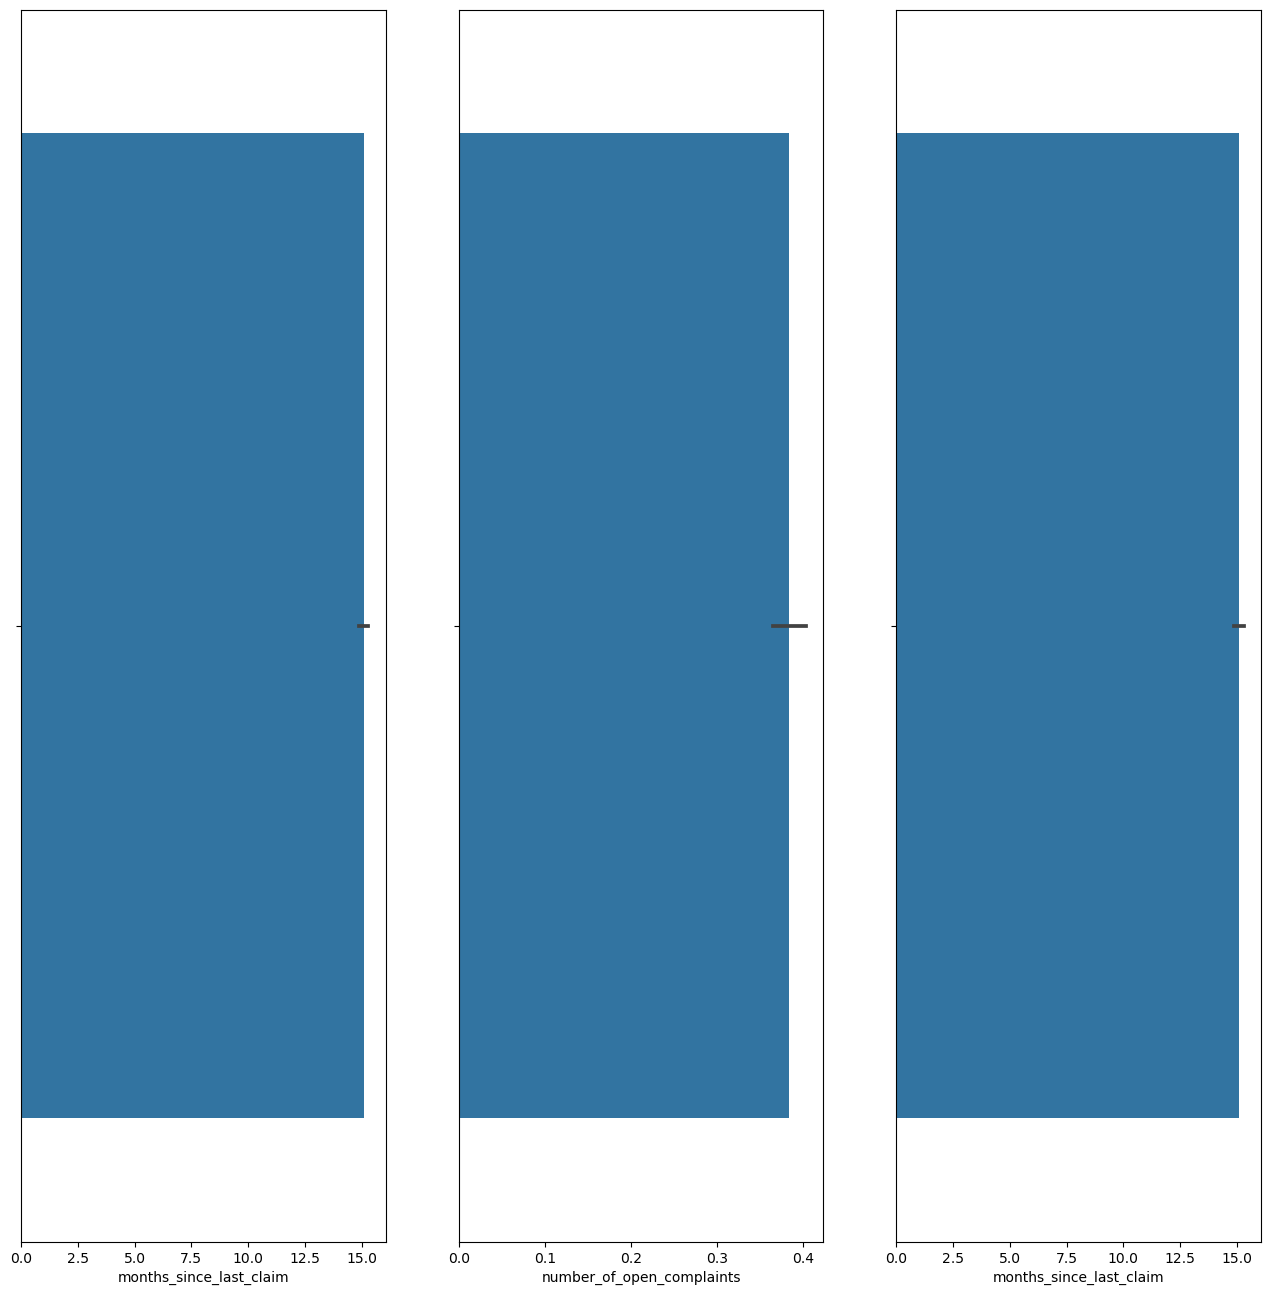

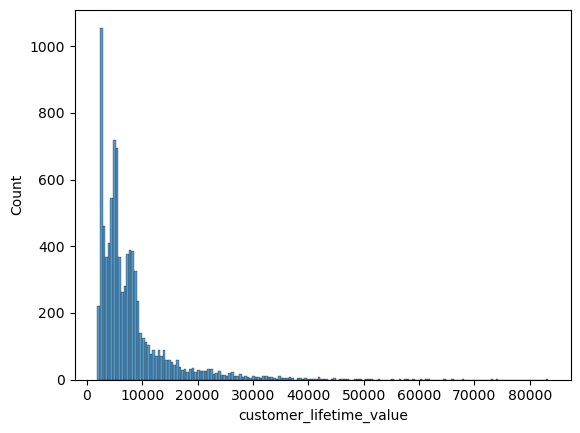

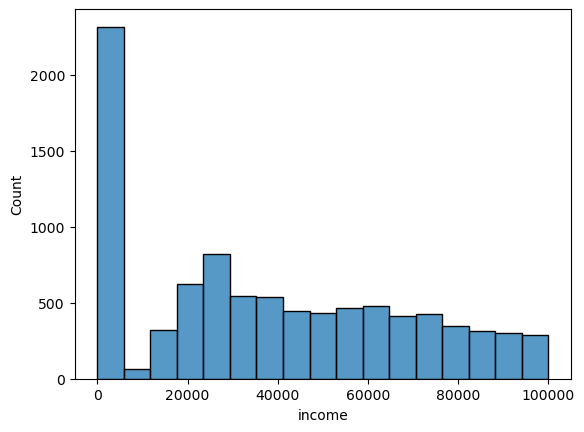

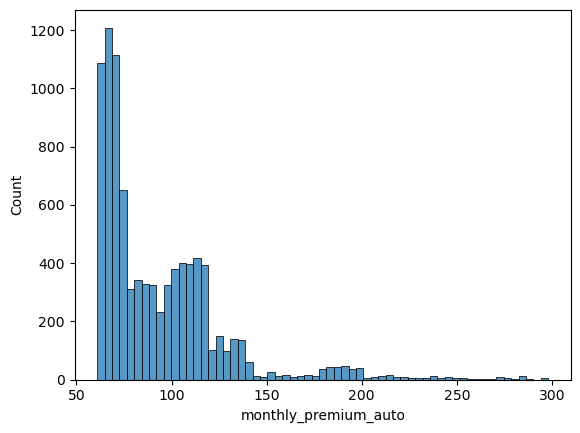

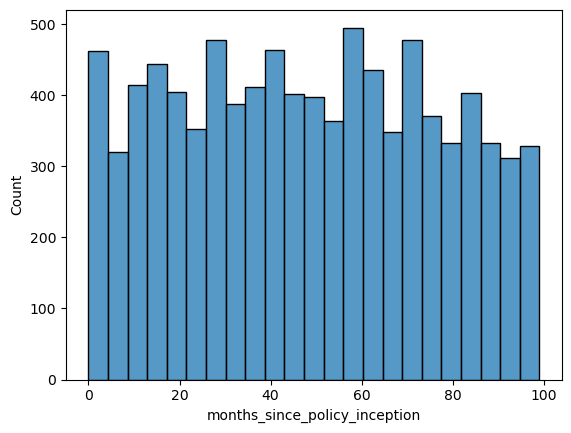

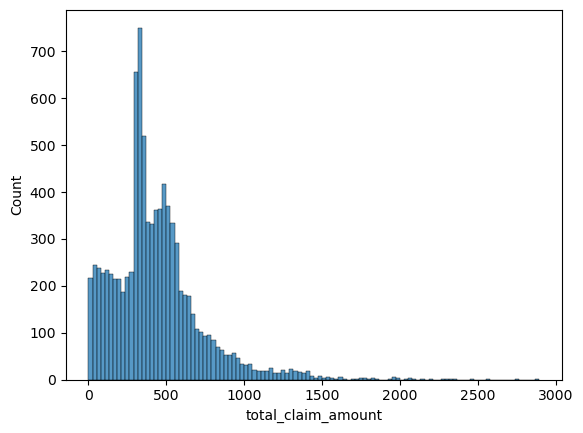

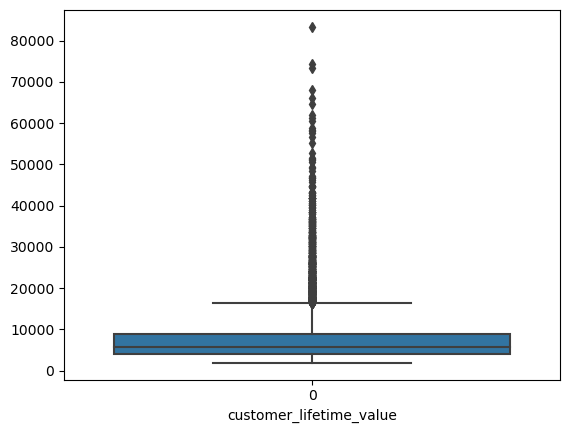

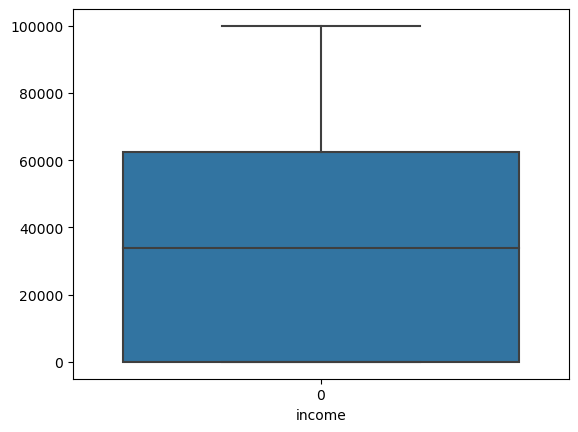

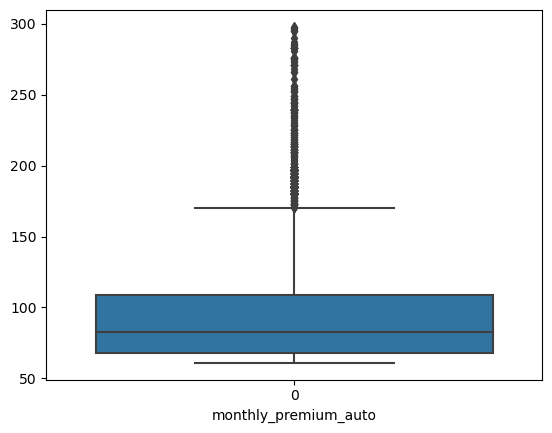

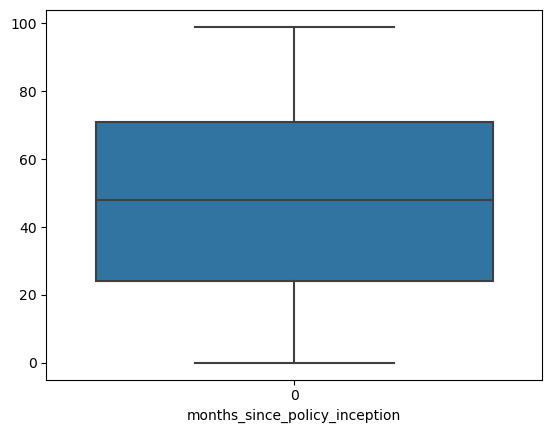

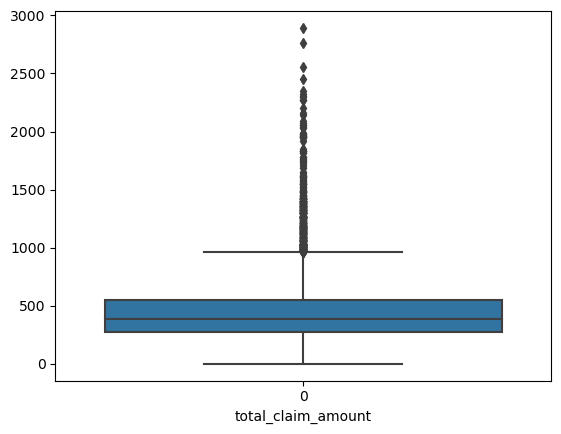

In [2]:
# Re-importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

customer_df = pd.read_csv('customer_value_analysis.csv')

# Revised code with the necessary imports and adjustments
customer_df.columns = customer_df.columns.str.replace(' ', '_').str.lower() 
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Splitting numerical and categorical columns
numerical_cols = customer_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = customer_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop 'customer' column if exists
if 'customer' in customer_df.columns:
    customer_df.drop(columns='customer', inplace=True)

# Correlation matrix heatmap
sns.heatmap(customer_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# Continuous vs Discrete Split
threshold = 36
continuous_cols = [col for col in numerical_cols if customer_df[col].nunique() > threshold]
discrete_cols = list(set(numerical_cols) - set(continuous_cols))

# Plotting Discrete Variables
fig, ax = plt.subplots(1, 3, figsize=(16,16))
sns.barplot(x="months_since_last_claim", data=customer_df, ax=ax[0])
sns.barplot(x="number_of_open_complaints", data=customer_df, ax=ax[1])
sns.barplot(x="months_since_last_claim", data=customer_df, ax=ax[2])
plt.show()

# Histograms for continuous variables
for col in continuous_cols:
    sns.histplot(customer_df[col], kde=False)
    plt.xlabel(col)
    plt.show()

# Boxplots for Outliers in continuous variables
for col in continuous_cols:
    sns.boxplot(customer_df[col])
    plt.xlabel(col)
    plt.show()
